In [27]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [28]:
tickers = ['MSTR', 'ADBE', 'NVO', 'BTC-USD']

In [29]:
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

# Download historical data from yf API
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# download data to csv using tickers names and end_date as filename
data.to_csv("_".join(tickers) + "_" + end_date + ".csv")

# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("_".join(tickers) + "_" + end_date + ".csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# Convert index to datetime
df.index = pd.to_datetime(df.index)

# Show the result
df.head()

[*********************100%***********************]  4 of 4 completed


Ticker        MSTR                                          ADBE              \
Price         Open    High     Low   Close    Volume        Open        High   
Date                                                                           
2020-01-01     NaN     NaN     NaN     NaN       NaN         NaN         NaN   
2020-01-02  14.284  14.489  14.272  14.431  276000.0  330.000000  334.480011   
2020-01-03  14.302  14.489  14.280  14.357  585000.0  329.170013  332.980011   
2020-01-04     NaN     NaN     NaN     NaN       NaN         NaN         NaN   
2020-01-05     NaN     NaN     NaN     NaN       NaN         NaN         NaN   

Ticker                                               NVO             \
Price              Low       Close     Volume       Open       High   
Date                                                                  
2020-01-01         NaN         NaN        NaN        NaN        NaN   
2020-01-02  329.170013  334.429993  1990100.0  26.487124  26.528006   
2020-01-03  328.690002  331.809998  1577600.0  25.851180  26.073762   
2020-01-04         NaN         NaN        NaN        NaN        NaN   
2020-01-05         NaN         NaN        NaN        NaN        NaN   

Ticker                                           BTC-USD               \
Price             Low      Close     Volume         Open         High   
Date                                                                    
2020-01-01        NaN        NaN        NaN  7194.892090  7254.330566   
2020-01-02  26.350849  26.509836  2224800.0  7202.551270  7212.155273   
2020-01-03  25.828468  25.942030  2491200.0  6984.428711  7413.715332   
2020-01-04        NaN        NaN        NaN  7345.375488  7427.385742   
2020-01-05        NaN        NaN        NaN  7410.451660  7544.497070   

Ticker                                              
Price               Low        Close        Volume  
Date                                                
2020-01-01  7174.944336  7200.174316  1.856566e+10  
2020-01-02  6935.270020  6985.470215  2.080208e+10  
2020-01-03  6914.996094  7344.884277  2.811148e+10  
2020-01-04  7309.514160  7410.656738  1.844427e+10  
2020-01-05  7400.535645  7411.317383  1.972507e+10

In [30]:
# keep only 'Close' prices for each ticker
df = df.xs('Close', level=1, axis=1)

In [31]:
# Show the result
df.head()

Ticker,MSTR,ADBE,NVO,BTC-USD
Date,,,,
2020-01-01,NaN,NaN,NaN,7200.174316
2020-01-02,14.431,334.429993,26.509836,6985.470215
2020-01-03,14.357,331.809998,25.942030,7344.884277
2020-01-04,NaN,NaN,NaN,7410.656738
2020-01-05,NaN,NaN,NaN,7411.317383


In [32]:
# function to invert prices
def invert_prices(prices):
    return 1 / prices

# Invert prices for each ticker
inverted_df = df.apply(invert_prices)

In [33]:
inverted_df.head()

Ticker,MSTR,ADBE,NVO,BTC-USD
Date,,,,
2020-01-01,NaN,NaN,NaN,0.000139
2020-01-02,0.069295,0.002990,0.037722,0.000143
2020-01-03,0.069652,0.003014,0.038547,0.000136
2020-01-04,NaN,NaN,NaN,0.000135
2020-01-05,NaN,NaN,NaN,0.000135


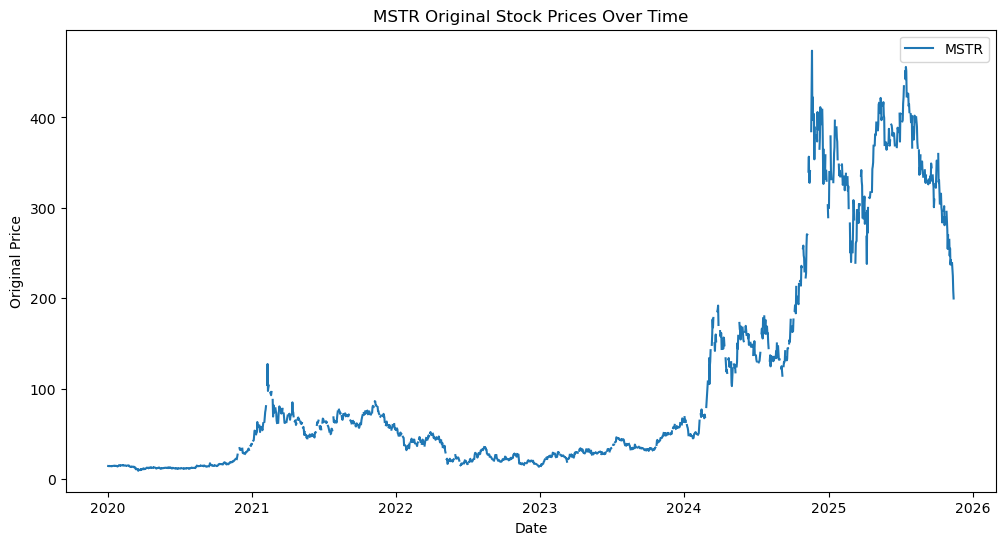

In [34]:
# plot MSTR original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MSTR'], label='MSTR')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('MSTR Original Stock Prices Over Time')
plt.legend()
plt.show()

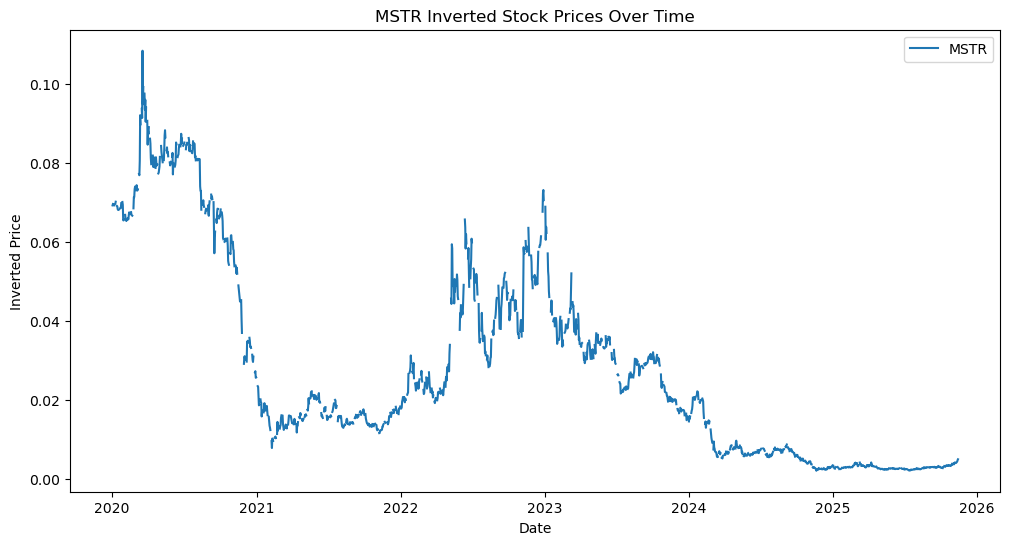

In [35]:
# plot MSTR inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['MSTR'], label='MSTR')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('MSTR Inverted Stock Prices Over Time')
plt.legend()
plt.show()

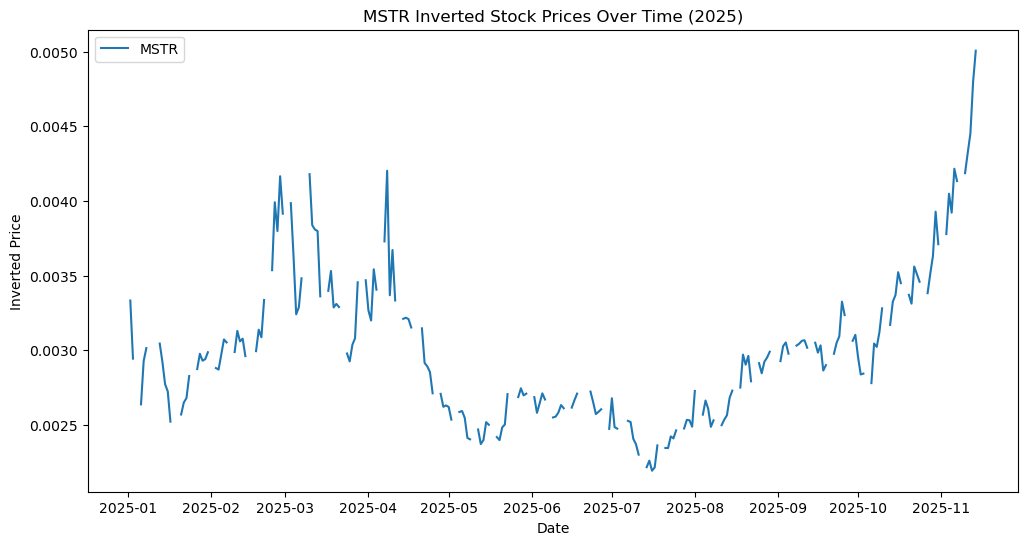

In [36]:
# plot MSTR inverted prices, for year current year only
current_year = dt.datetime.now().year
plt.figure(figsize=(12, 6))
plt.plot(inverted_df[inverted_df.index.year == current_year].index, inverted_df[inverted_df.index.year == current_year]['MSTR'], label='MSTR')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title(f'MSTR Inverted Stock Prices Over Time ({current_year})')
plt.legend()
plt.show()

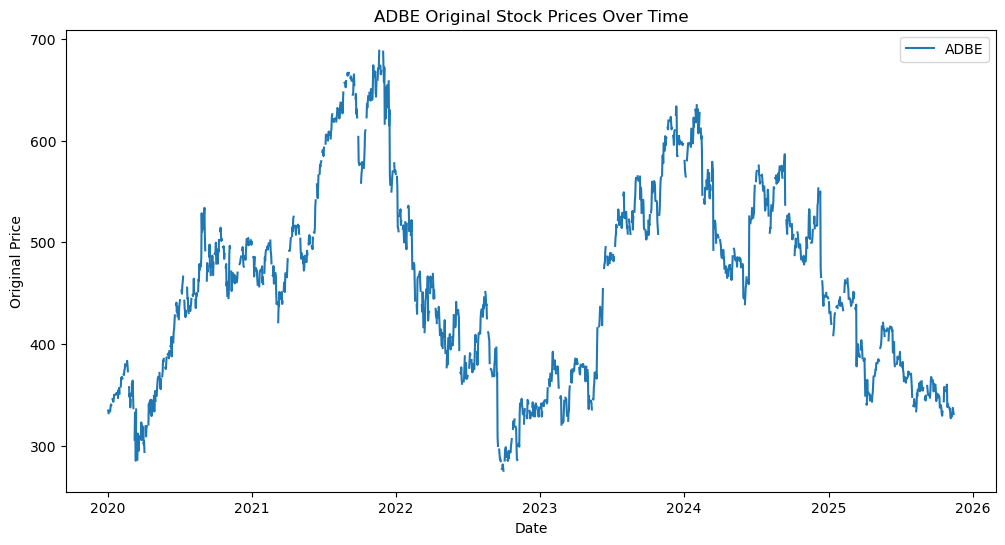

In [37]:
# plot ADBE original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ADBE'], label='ADBE')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('ADBE Original Stock Prices Over Time')
plt.legend()
plt.show()

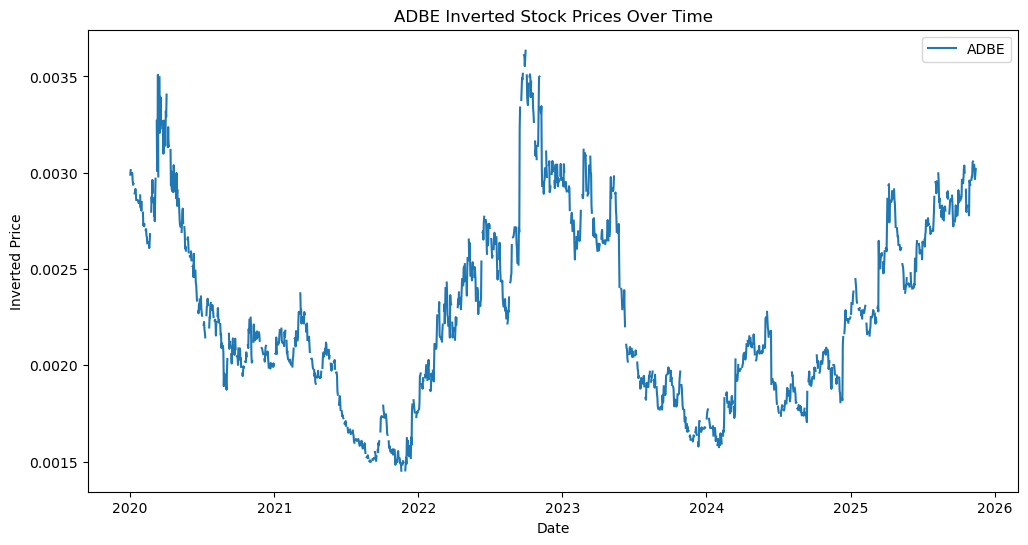

In [38]:
# plot ADBE inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['ADBE'], label='ADBE')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('ADBE Inverted Stock Prices Over Time')
plt.legend()
plt.show()

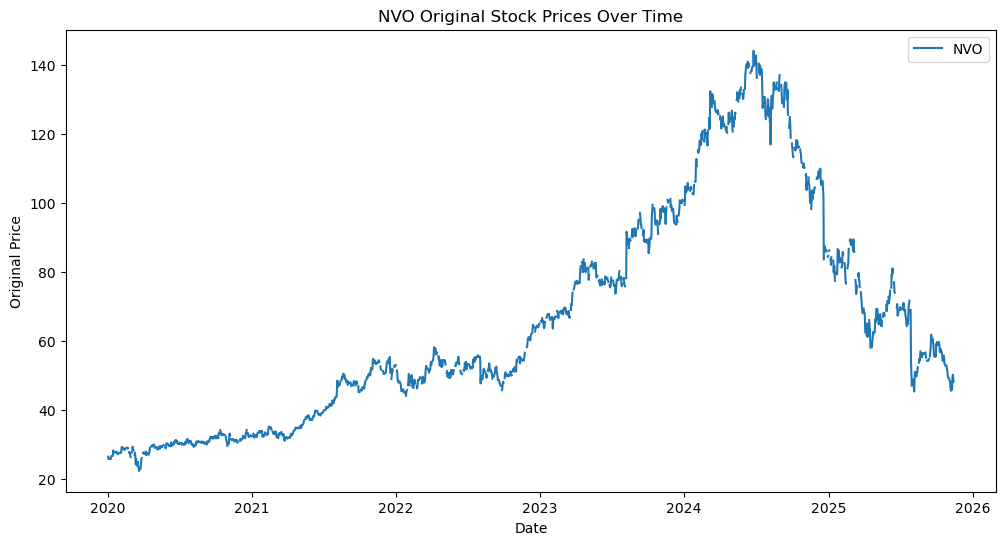

In [39]:
# plot NVO original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['NVO'], label='NVO')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('NVO Original Stock Prices Over Time')
plt.legend()
plt.show()

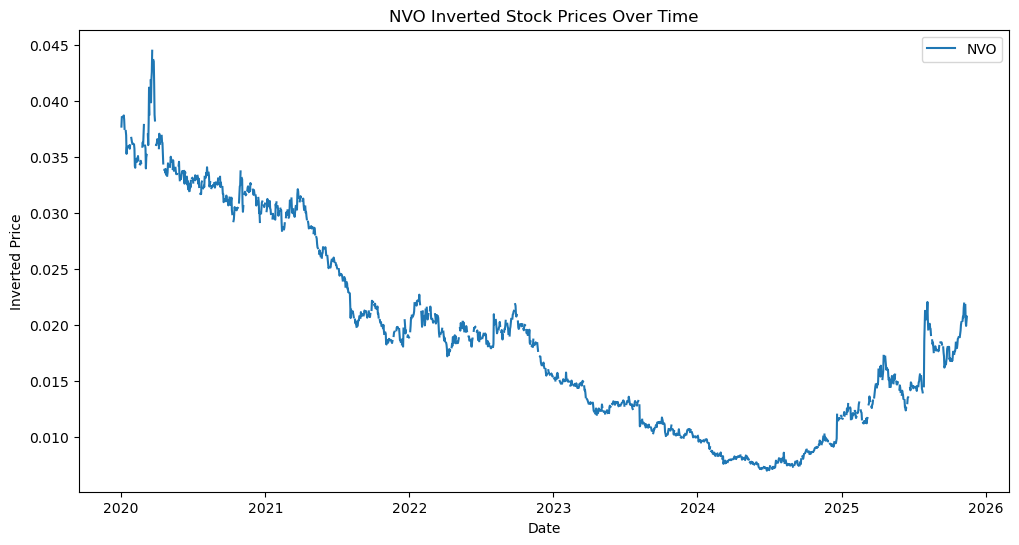

In [40]:
# plot NVO inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['NVO'], label='NVO')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('NVO Inverted Stock Prices Over Time')
plt.legend()
plt.show()

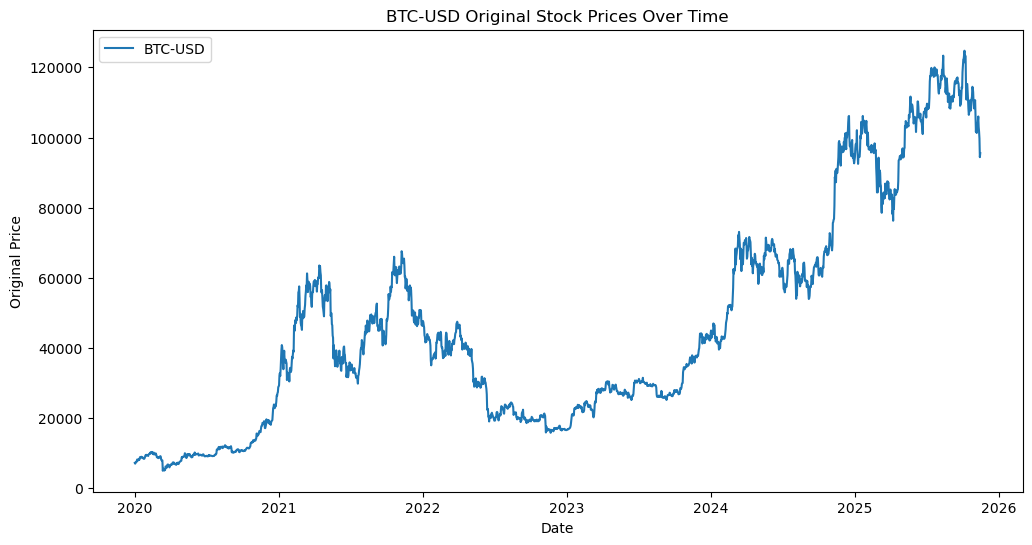

In [41]:
# plot BTC-USD original prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['BTC-USD'], label='BTC-USD')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title('BTC-USD Original Stock Prices Over Time')
plt.legend()
plt.show()

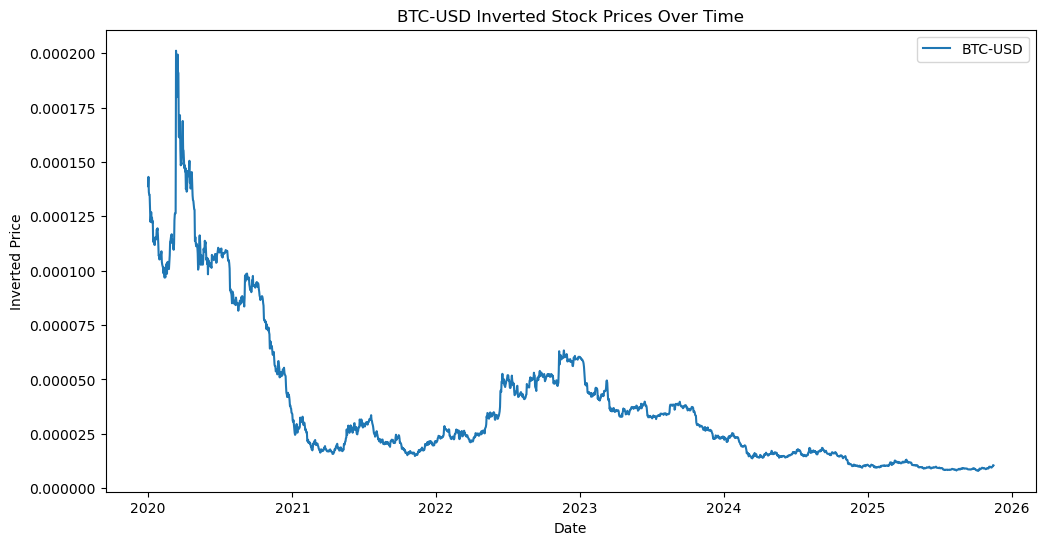

In [42]:
# plot BTC-USD inverted prices
plt.figure(figsize=(12, 6))
plt.plot(inverted_df.index, inverted_df['BTC-USD'], label='BTC-USD')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title('BTC-USD Inverted Stock Prices Over Time')
plt.legend()
plt.show()

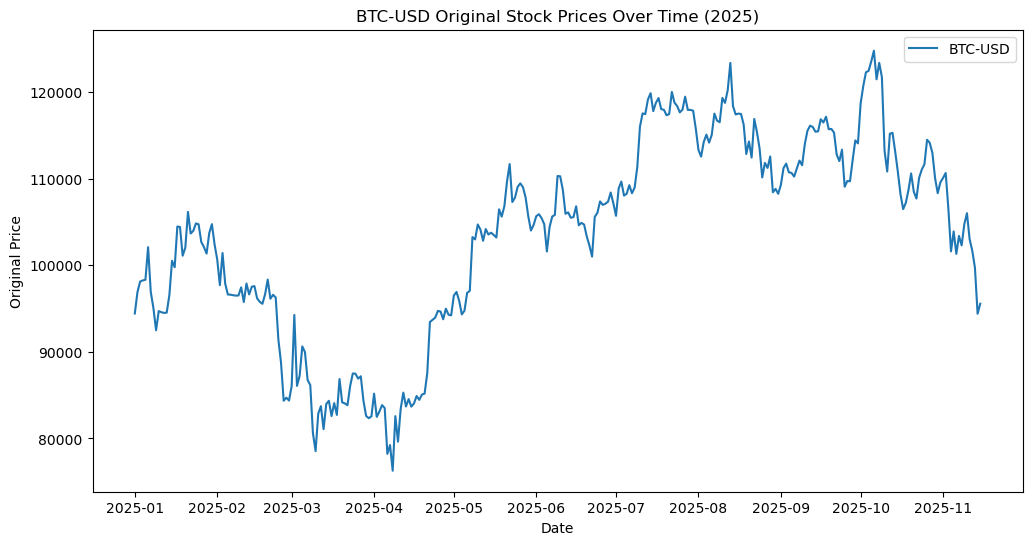

In [44]:
# plot BTC-USD original prices current year only
current_year = dt.datetime.now().year
plt.figure(figsize=(12, 6))
plt.plot(df[df.index.year == current_year].index, df[df.index.year == current_year]['BTC-USD'], label='BTC-USD')
plt.xlabel('Date')
plt.ylabel('Original Price')
plt.title(f'BTC-USD Original Stock Prices Over Time ({current_year})')
plt.legend()
plt.show()

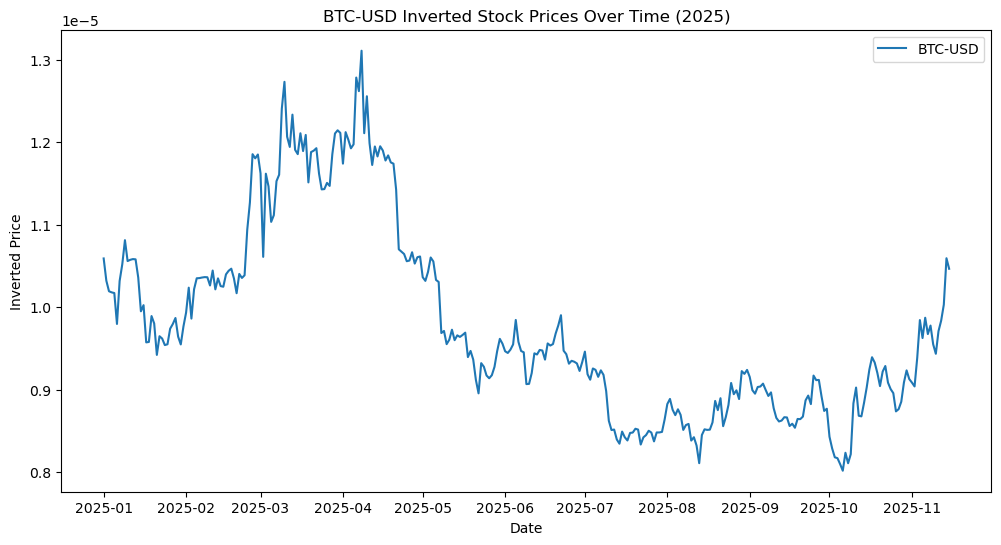

In [43]:
# plot BTC-USD inverted prices current year only
current_year = dt.datetime.now().year
plt.figure(figsize=(12, 6))
plt.plot(inverted_df[inverted_df.index.year == current_year].index, inverted_df[inverted_df.index.year == current_year]['BTC-USD'], label='BTC-USD')
plt.xlabel('Date')
plt.ylabel('Inverted Price')
plt.title(f'BTC-USD Inverted Stock Prices Over Time ({current_year})')
plt.legend()
plt.show()